# Activate Functions

## Sigmoid Function
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

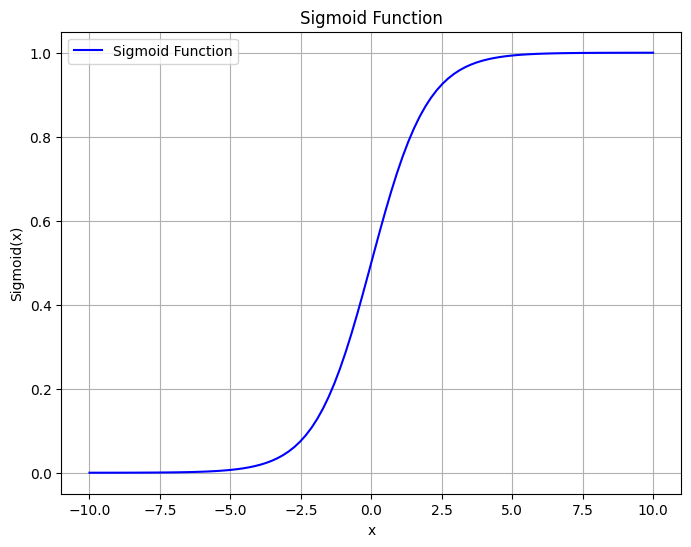

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.figure(figsize = (8, 6))
plt.plot(x_values, y_values, label = "Sigmoid Function", color = "b")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.legend()
plt.show()

## Tanh Function (Hyperbolic Tangent Function)
$$tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

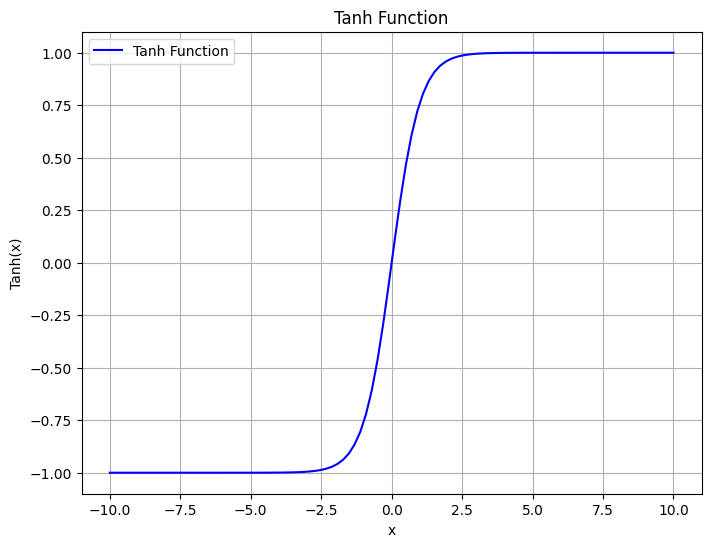

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)
    
x_values = np.linspace(-10, 10, 100)
y_values = tanh(x_values)

plt.figure(figsize = (8, 6))
plt.plot(x_values, y_values, label = "Tanh Function", color = "b")
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.grid(True)
plt.legend()
plt.show()

## ReLU Function (Rectified Linear Unit)
$$ReLu(x) = max(0, x)$$

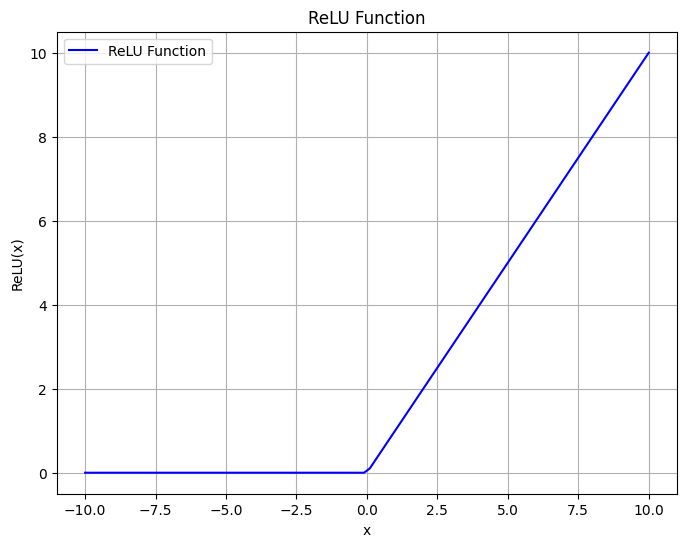

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)
    
x_values = np.linspace(-10, 10, 100)
y_values = relu(x_values)

plt.figure(figsize = (8, 6))
plt.plot(x_values, y_values, label = "ReLU Function", color = "b")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()

# Perceptron Predict Iris

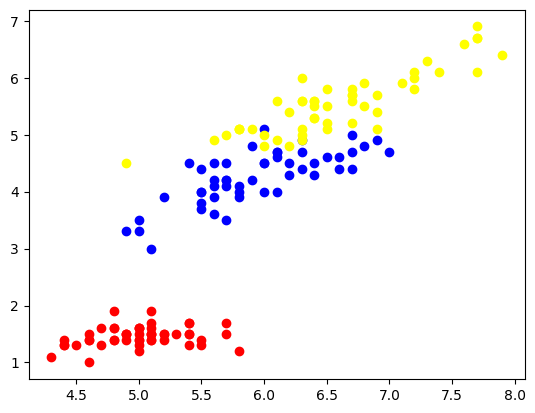

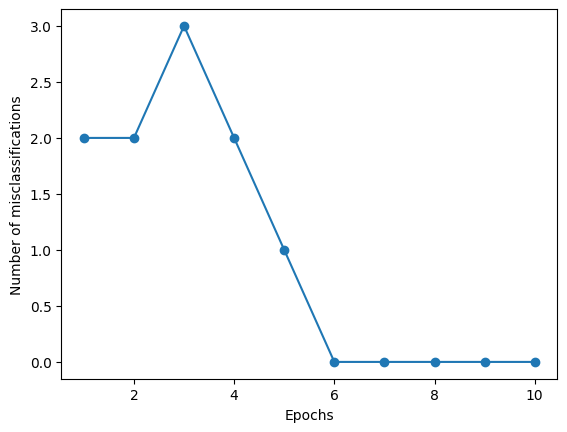

/var/folders/ly/4jgkxntx463ghnpv_mjkrb600000gn/T/ipykernel_22635/2331166602.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


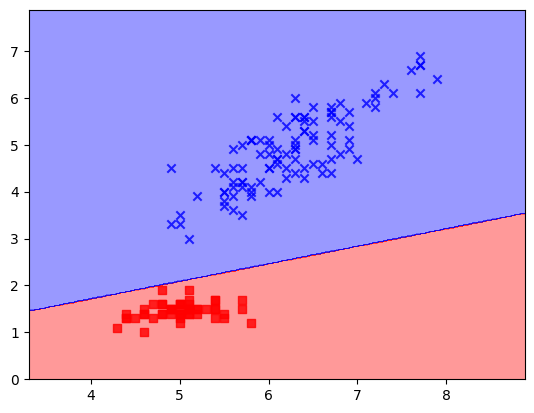

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

# create a perceptron
class Perceptron(object):
    # initial learning rate and the number of iterations
    def __init__(self, Learn_Rate=0.5, Iterations=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])

    # train
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    # 淨輸入方法用於加總給定矩陣輸入及其相應的權重。
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    # predict
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

# preprocess
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[0:150, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# train
Classifier = Perceptron(Learn_Rate = 0.01, Iterations = 10)
Classifier.fit(x, y)
plt.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# plot decision region
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(x, y, classifier=Classifier)
plt.show()

# Perceptron Predict Iris -- sklearn

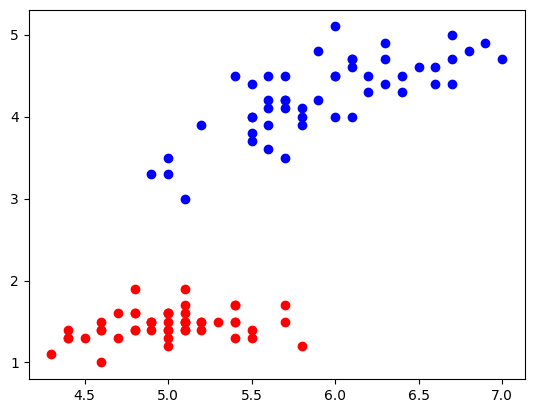

/var/folders/ly/4jgkxntx463ghnpv_mjkrb600000gn/T/ipykernel_22635/3790449751.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


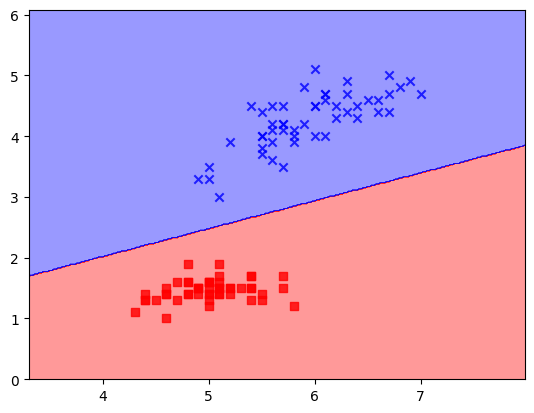

In [5]:
# Importing dependencies.
# 引入相依套件。
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron

# Data retrieval and preparation.
# 數據檢索和準備。
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Model training and evaluation.
# 模型訓練與評估。
classifier = Perceptron(alpha=0.01, max_iter=50, random_state=0)
classifier.fit(x, y)

# Defining function that plots the decision regions.
# 定義繪製決策區域的函數。
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    # 設置標記生成器和顏色映射
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    # 繪製決策表面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    # 繪製類別樣本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
# 顯示感知器模型的最終結果。
plot_decision_regions(x, y, classifier=classifier)
plt.show()

# Perceptron Predict Digits

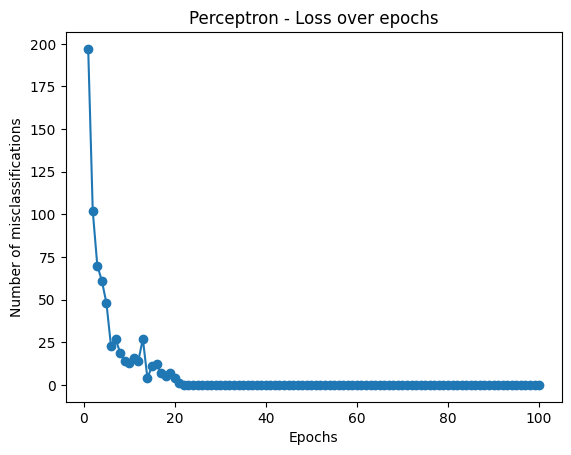

Accuracy: 94.81%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultiClassPerceptron(object):
    def __init__(self, Learn_Rate=0.01, Iterations=100, n_classes=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.n_classes = n_classes
        self.weights = None
        self.errors_ = []  # Storing the number of misclassifications for each epoch

    def fit(self, X, y):
        self.weights = np.zeros((self.n_classes, X.shape[1] + 1))
        for _ in range(self.Iterations):
            errors = 0
            for xi, target in zip(X, y):
                actual_class = self.predict(xi)
                if actual_class != target:
                    self.weights[target, 1:] += self.learn_rate * xi
                    self.weights[target, 0] += self.learn_rate
                    self.weights[actual_class, 1:] -= self.learn_rate * xi
                    self.weights[actual_class, 0] -= self.learn_rate
                    errors += 1
            self.errors_.append(errors)

    def net_input(self, X, w):
        return np.dot(X, w[1:]) + w[0]

    def predict(self, X):
        results = np.dot(self.weights[:, 1:], X) + self.weights[:, 0]
        return np.argmax(results)

# Load the digits dataset
digits = load_digits()

# Preparing the data
X, y = digits.data, digits.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Model training
Classifier = MultiClassPerceptron(Learn_Rate=1e-8, Iterations=100)
Classifier.fit(X_train_std, y_train)

# Plotting the number of misclassifications over epochs
plt.plot(range(1, len(Classifier.errors_) + 1), Classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Loss over epochs')
plt.show()

# Evaluating the model accuracy
predictions = np.array([Classifier.predict(x) for x in X_test_std])
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2%}")

# Perceptron Predict Digits - Tanh

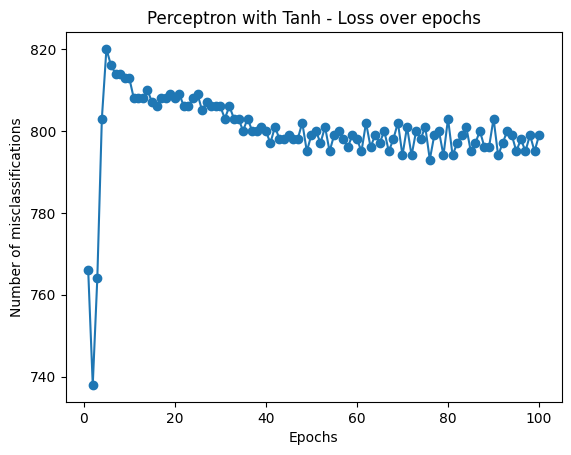

Accuracy: 34.07%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultiClassPerceptronWithTanh(object):
    def __init__(self, Learn_Rate=0.01, Iterations=100, n_classes=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.n_classes = n_classes
        self.weights = None
        self.errors_ = []

    def fit(self, X, y):
        self.weights = np.zeros((self.n_classes, X.shape[1] + 1))
        for _ in range(self.Iterations):
            errors = 0
            for xi, target in zip(X, y):
                actual_class = self.predict(xi)
                if actual_class != target:
                    error = (target - actual_class)
                    self.weights[target, 1:] += self.learn_rate * xi * error
                    self.weights[target, 0] += self.learn_rate * error
                    errors += 1
            self.errors_.append(errors)

    def net_input(self, X, w):
        return np.dot(X, w[1:]) + w[0]

    def activation(self, z):
        return np.tanh(z)

    def predict(self, X):
        results = []
        for w in self.weights:
            z = self.net_input(X, w)
            a = self.activation(z)
            results.append(a)
        return np.argmax(results)

# Load the digits dataset
digits = load_digits()

# Preparing the data
X, y = digits.data, digits.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Model training
Classifier = MultiClassPerceptronWithTanh(Learn_Rate=1e-8, Iterations=100)
Classifier.fit(X_train_std, y_train)

# Plotting the number of misclassifications over epochs
plt.plot(range(1, len(Classifier.errors_) + 1), Classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron with Tanh - Loss over epochs')
plt.show()

# Evaluating the model accuracy
predictions = np.array([Classifier.predict(x) for x in X_test_std])
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2%}")

# Perceptron Predict Digits - Sigmoid

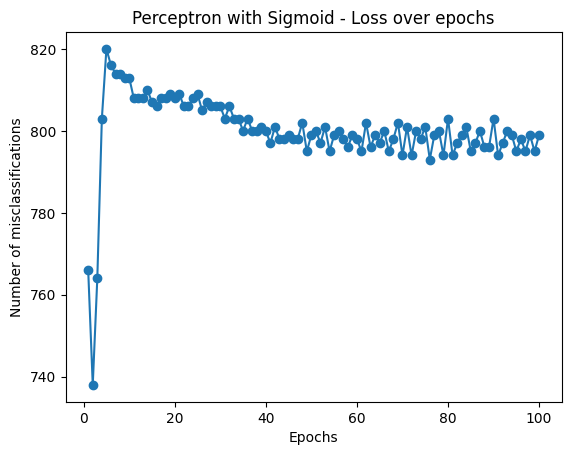

Accuracy: 34.07%


In [8]:
### sigmoid

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultiClassPerceptronWithSigmoid(object):
    def __init__(self, Learn_Rate=0.01, Iterations=100, n_classes=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.n_classes = n_classes
        self.weights = None
        self.errors_ = []

    def fit(self, X, y):
        self.weights = np.zeros((self.n_classes, X.shape[1] + 1))
        for _ in range(self.Iterations):
            errors = 0
            for xi, target in zip(X, y):
                actual_class = self.predict(xi)
                if actual_class != target:
                    error = (target - actual_class)
                    self.weights[target, 1:] += self.learn_rate * xi * error
                    self.weights[target, 0] += self.learn_rate * error
                    errors += 1
            self.errors_.append(errors)

    def net_input(self, X, w):
        return np.dot(X, w[1:]) + w[0]

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        results = []
        for w in self.weights:
            z = self.net_input(X, w)
            a = self.activation(z)
            results.append(a)
        return np.argmax(results)

# Load the digits dataset
digits = load_digits()

# Preparing the data
X, y = digits.data, digits.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Model training
Classifier = MultiClassPerceptronWithSigmoid(Learn_Rate=1e-8, Iterations=100)
Classifier.fit(X_train_std, y_train)

# Plotting the number of misclassifications over epochs
plt.plot(range(1, len(Classifier.errors_) + 1), Classifier.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron with Sigmoid - Loss over epochs')
plt.show()

# Evaluating the model accuracy
predictions = np.array([Classifier.predict(x) for x in X_test_std])
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2%}")